In [0]:
#libraries
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
from skimage import exposure
from math import ceil
import skimage.data


In [0]:
#convolution2d function
def convolution2d(conv_input, conv_kernel, strides, padding='same'):
    # This function which takes an input (Tensor) and a kernel (Tensor)
    # and returns the convolution of them
    # Args:
    #   conv_input: a numpy array of size [input_height, input_width, input # of channels].
    #   conv_kernel: a numpy array of size [kernel_height, kernel_width, input # of channels, 
    #         output # of channels] represents the kernel of the Convolutional Layer's filter.
    #   strides: a tuple of (convolution vertical stride, convolution horizontal stride).
    #   padding: type of the padding scheme: 'same' or 'valid'.
        # if stride is not valid then program, will add the padding
    # Returns:
    #   a numpy array (convolution output).
    
    if (conv_kernel.shape[2] > 3):
        print('Error height of the kernel can not exceed height of the image')
        return
    if conv_kernel.shape[2] != conv_input.shape[2]:
        print('Depth of the kernel and input image should be same')
        return
    

    # input_width, input_height,input_length
    input_w, input_h,input_l = conv_input.shape[1], conv_input.shape[0], conv_input.shape[0]     
    # kernel_width, kernel_height,kernel_length
    kernel_w, kernel_h, kernel_l = conv_kernel.shape[1], conv_kernel.shape[0],conv_kernel.shape[2]
    output_depth = conv_kernel.shape[3]
    
    

    if padding == 'same':
        output_height = int(ceil(float(input_h) / float(strides[0])))
        output_width = int(ceil(float(input_w) / float(strides[1])))

        # Calculate the number of zeros which are needed to add as padding
        pad_along_height = max((output_height - 1) * strides[0] + kernel_h - input_h, 0)
        pad_along_width = max((output_width - 1) * strides[1] + kernel_w - input_w, 0)
        pad_top = pad_along_height // 2             # amount of zero padding on the top
        pad_bottom = pad_along_height - pad_top     # amount of zero padding on the bottom
        pad_left = pad_along_width // 2             # amount of zero padding on the left
        pad_right = pad_along_width - pad_left      # amount of zero padding on the right

        output = np.zeros((output_height, output_width, output_depth))  # convolution output

        # Add zero padding to the input image
        image_padded = np.zeros((conv_input.shape[0] + pad_along_height,
                                 conv_input.shape[1] + pad_along_width, conv_input.shape[2]))
        image_padded[pad_top:-pad_bottom, pad_left:-pad_right, :] = conv_input

        for ch in range(output_depth):
            for x in range(output_width):  # Loop over every pixel of the output
                for y in range(output_height):
                    # element-wise multiplication of the kernel and the image
                    output[y, x, ch] = (conv_kernel[..., ch] * 
                                     image_padded[y * strides[0]:y * strides[0] + kernel_h,
                                     x * strides[1]:x * strides[1] + kernel_w, :]).sum()

    elif padding == 'valid':
        output_height = int(ceil(float(input_h - kernel_h + 1) / float(strides[0])))
        output_width = int(ceil(float(input_w - kernel_w + 1) / float(strides[1])))

        output = np.zeros((output_height, output_width, output_depth))  # convolution output

        for ch in range(output_depth):
            for x in range(output_width):  # Loop over every pixel of the output
                for y in range(output_height):
                    # element-wise multiplication of the kernel and the image
                    output[y, x, ch] = (conv_kernel[..., ch] * 
                                     conv_input[y * strides[0]:y * strides[0] + kernel_h,
                                     x * strides[1]:x * strides[1] + kernel_w, :]).sum()

    return output




(300, 451, 3)


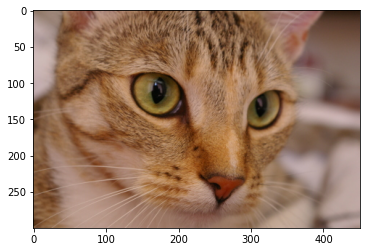

In [26]:
# loading the input image
img =  skimage.data.chelsea()
print(img.shape)

plt.imshow(img)


In [27]:
#Kernel setups

# The edge detection kernel
kernel1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])[..., None]
# will create 3-kernels with each element expanded along the row three times
kernel1 = np.repeat(kernel1, 3, axis=2)

# The blur kernel
kernel2 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])[..., None]/9.0
kernel2 = np.repeat(kernel2, 3, axis=2)

kernel = np.zeros_like(kernel1, dtype=np.float)[..., None]
kernel = np.repeat(kernel, 2, axis=3)
kernel[..., 0] = kernel1
kernel[..., 1] = kernel2


print(kernel1.shape)
print(kernel2.shape)
print(kernel.shape)
print(kernel.shape[3])


# print(kernel1)
# print(kernel2)

(3, 3, 3)
(3, 3, 3)
(3, 3, 3, 2)
2


In [28]:
#convoluted output shapes of the output
image_edges = convolution2d(img*255, kernel, strides=(1,1))
print(image_edges.shape)
print('edge detection convoluted matrix')
print(image_edges[...,0])

print('blur convoluted matrix')
print(image_edges[...,1])


(300, 451, 2)
edge detection convoluted matrix
[[ 2.020e+03  1.212e+03  1.248e+03 ...  2.069e+03  2.060e+03  3.423e+03]
 [ 1.172e+03  0.000e+00  2.400e+01 ...  1.900e+01  2.600e+01  2.028e+03]
 [ 1.134e+03 -1.500e+01  3.000e+00 ...  1.300e+01 -3.000e+00  1.994e+03]
 ...
 [ 1.960e+03  7.000e+01 -4.720e+02 ... -7.000e+00 -9.000e+00  9.330e+02]
 [ 1.361e+03 -3.820e+02 -1.780e+02 ... -1.000e+00  6.000e+00  9.630e+02]
 [ 2.201e+03  1.591e+03  1.578e+03 ...  1.073e+03  1.080e+03  1.724e+03]]
blur convoluted matrix
[[176.55555556 266.33333333 268.33333333 ... 453.11111111 454.11111111
  302.66666667]
 [261.77777778 395.         398.33333333 ... 677.88888889 678.11111111
  451.66666667]
 [256.         386.66666667 390.66666667 ... 673.55555556 672.33333333
  447.44444444]
 ...
 [370.22222222 541.22222222 519.44444444 ... 313.77777778 314.
  209.33333333]
 [336.77777778 497.44444444 494.77777778 ... 328.11111111 327.33333333
  218.        ]
 [210.44444444 319.22222222 328.66666667 ... 223.77777

(300, 451)


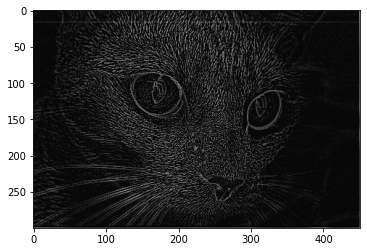

In [29]:
#First output of convoluted image ---edge detection
# Adjust the contrast and plot the first channel of the output for edge detection
image_edges_equalized = exposure.equalize_adapthist(image_edges[..., 0] / 
                                 np.max(np.abs(image_edges[..., 0])), clip_limit=0.03)

# Plot the first channel of the output
print(image_edges_equalized.shape)
plt.imshow(image_edges_equalized, cmap=plt.cm.gray)


(300, 451)


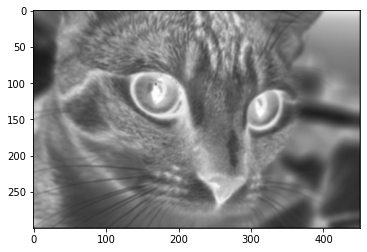

In [30]:
#second output of convoluted image ---Blurring the image
# Plot the second channel of the output
print(image_edges[..., 1].shape)
plt.imshow(image_edges[..., 1], cmap=plt.cm.gray)

